# Analyzing Customer Booking Trends to Identify Marketing Opportunities



**Overview**

Part 1  Introduction<br>

Part 2  Data Preparation & Data Cleaning<br>

Part 3  Exploratory Data Analysis<br>

Part 4 Conclusion

Appendix A Dashbaord

Appendix B References

## Part 1  Introduction

#### 1. Introduction & Motivation

The most vital aspect of the hospitality industry is enhancing the customer experience, building relationships, and creating a base of patrons; this not only saves the cost of acquiring new customers, but also builds goodwill. <br>
The motivation for this study is to gain a deeper understanding of the following two aspects that are of significant importance to hoteliers:
- Customer booking trends<br> 
- Customer preferences<br> 

The analysis is conducted for a 4 Star Hotel in Lisbon, the capital of Portugal, to understand the hotel's customer base and examine how best to retain it. Based on the results, we suggest marketing strategies to target those customers effectively, thereby increasing occupancy and revenue. 

#### 2. Objective

The objective of our project is to
- Conduct analysis to understand customer segmentation.
- Gauge customer preferences to devise marketing strategies.

#### 3. Summary

The study analyzes customer booking trends based on geographic location, age group, repeat customers, distribution channels, and preferences. It identifies the age group that generates the most significant revenue (about 49%) and uses the variable average lead time to determine the right opportunity to target identified customer segments. Even though booking trends identify travel agents as the most commonly used distribution channels, further analysis reveals that focusing on promoting the direct channel can generate higher revenue through higher prices per room. Further study is conducted to understand customers' preferences from geographic segments that create the highest revenue. Based on the above analysis, marketing strategies have been suggested. 


#### 4. Data Source

The dataset comprises of customer behavioral data for the year 2015 to 2018. In addition to personal and behavioral information, the dataset also contains demographic information such as age and geographical information such as customer nationality. In total, there are 31 fields describing a total of 83,590 customers.<br>

Antonio, Nuno; de Almeida, Ana; Nunes, Luis (2020), “Lisbon, Portugal, hotel’s customer dataset with three years of personal, behavioral, demographic, and geographic information”, Mendeley Data, V1, doi: 10.17632/j83f5fsh6c.1<br>
https://data.mendeley.com/datasets/j83f5fsh6c/1

(Kaggle link: https://www.kaggle.com/datasets/nantonio/a-hotels-customers-dataset)

#### 5. Key Columns

<table>
<tr><th> Column Name <th><th> Brief Description <th><th> Count  <th><th> Mean <th><th> Min <th><th> Max <tr><tr>
<tr><td> ID <td><td> Customer ID <td><td> 83590 <td><td> 41795 <td><td> 1 <td><td> 83590 <tr><tr>
<tr><td> Nationality <td><td> Country where the customer come from <td><td> 83590 <td><td> -- <td><td> -- <td><td> -- <tr><tr>
<tr><td> Age <td><td> Age of the customer (in years) <td><td> 79811 <td><td> 45.39 <td><td> -11.00 <td><td> 122.00 <tr><tr>
<tr><td> AverageLeadTime <td><td> The average number of days that passed between the reservation date and the arrival date of the customer <td><td> 83590 <td><td> 66.19 <td><td> -1.00 <td><td> 588.00 <tr><tr>
<tr><td> LodgingRevenue <td><td> Total amount the consumer has spent on lodging expenses (in Euros)<br>This value includes hotel costs for the room, crib, and related charges <td><td> 83590 <td><td> 298.80 <td><td> 0.00 <td><td> 21781.00 <tr><tr>        
<tr><td> OtherRevenue <td><td> Total amount that the consumer has spent on other expenses (in Euros)<br> This amount accounts for food, drinks, spa visits, and other cost <td><td> 83590 <td><td> 67.59 <td><td> 0.00 <td><td> 7730.25 <tr><tr>
<tr><td> BookingsCheckedIn <td><td> Number of reservations made by the customer that result in stays <td><td> 83590 <td><td> 0.79 <td><td> 0 <td><td> 66 <tr><tr>   
<tr><td> RoomNights <td><td> Number of rooms/nights the client spent at the hotel in total (checked-in bookings) <td><td> 83590 <td><td> 2.36 <td><td> 0 <td><td> 185 <tr><tr>
<tr><td> DaysSinceLastStay <td><td> The number of days that passed between the final day of the extraction and the last day the customer arrived (of a checked-in booking) <td><td> 83590 <td><td> 401 <td><td> -1 <td><td> 1104 <tr><tr>
<tr><td> DaysSinceFirstStay <td><td> The number of days that passed between the final day of the extraction and the last day the customer arrived (of a checked-in booking) <td><td> 83590 <td><td> 403 <td><td> -1 <td><td> 1186 <tr><tr>
<tr><td> DistributionChannel <td><td> Distribution channel used by the customer to make hotel reservations <td><td> 83590 <td><td> -- <td><td> -- <td><td> -- <tr><tr>
<tr><td> SRKingSizeBed <td><td> Whether the client often requests a room with a king-size bed (0: No, 1: Yes) <td><td> 83590 <td><td> 0.35 <td><td> 0 <td><td> 1 <tr><tr>
<tr><td> SRTwinBed <td><td> Whether the customer often requests a room with a twin bed (0: No, 1: Yes) <td><td> 83590 <td><td> 0.14 <td><td> 0 <td><td> 1 <tr><tr>
<table>

#### 6. Stakeholders

Our stakeholder is the hotel management, who is interested in developing marketing strategies based on data analysis on customers' booking information.

#### 7. Limitations

Due to the lack of information about each customer's travel companions, such as whether they are traveling with a partner or have children staying with them, it is impossible to conduct further analysis of the booking behavior of each age group.<br>
This dataset only includes information about each customer's first and last stay, but without the total times of stay, we cannot dig into the loyalty degree of each customer.

## Part 2  Data Preparation & Data Cleaning

#### 1. Check the original data

In [17]:
%%bigquery
SELECT *
FROM `ba775-a09-fall22.hotelcustomerdataset.hotel-customer-dataset`
limit 3;

Downloading: 100%|██████████| 3/3 [00:01<00:00,  1.93rows/s]


,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,25208,ITA,47,640,1.189864e+76,5.158616e+76,21,246.4,14.0,0,...,0,0,0,0,0,0,0,0,0,0
1,52953,ESP,31,255,9.360460e+76,8.738363e+76,7,159.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
2,52971,CHE,59,255,8.846941e+76,7.281996e+75,2,275.2,30.0,0,...,0,0,0,0,1,0,0,0,0,0


#### 2. Check if there are any duplicates in "ID"

In [18]:
%%bigquery
--check duplicate ID
SELECT ID,COUNT(*)
FROM `ba775-a09-fall22.hotelcustomerdataset.hotel-customer-dataset`
GROUP BY ID
HAVING COUNT(*) > 1;

Query complete after 0.00s: 100%|██████████| 2/2 [00:00<00:00, 1203.36query/s]                        
Downloading: 0rows [00:00, ?rows/s]


,ID,f0_


#### 3. Transform data type and drop unnecessary columns
Transform "Age" data type into integer. <br>
Then, drop the unnecessary columns "NameHash" and "DocIDHash". Column "NameHash" contains anonymized information about each customer's name, and column "DocIDHash" contains anonymized information about each customer's DocID (passport number, national ID card number, etc.). Both columns have the same function as column "ID" to identify each unique customer. Thus, we drop these two columns because they do not provide additional information and insight for our analysis.<br>
Finally, save the table as a new table `hotelcustomerdataset.hotelcustomersdatasetcleaned`.

In [19]:
%%bigquery
CREATE TABLE IF NOT EXISTS ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned
AS
select 
ID,Nationality,safe_cast(Age as INT64) Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,
BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,
SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
FROM `ba775-a09-fall22.hotelcustomerdataset.hotel-customer-dataset`;

Query complete after 0.00s: 100%|██████████| 1/1 [00:00<00:00, 1095.40query/s]


""


#### 4. Check if there are any null values in "Age"

In [20]:
%%bigquery
select count(Age) Age_Count, count(*) Total, count(*)-count(Age) Null_Count
from `ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned`;

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.53s/rows]


,Age_Count,Total,Null_Count
0,79811,83590,3779


There are 3779 rows have null value in "Age".

#### 5. Identify outliers of "Age" with the lower/upper bound equals to 2 standard deviation below/above the mean

In [21]:
%%bigquery
SELECT
   data.Age,
   case
      when data.Age between mean - 2 * stdev and mean + 2 * stdev 
         then 'not outlier'
      else 'outlier'
   end label,
   mean - 2 * stdev lower_bound,
   mean + 2 * stdev upper_bound
FROM `ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned` AS data
CROSS JOIN 
   (
    SELECT
      avg(data.Age) mean,
      stddev_samp(data.Age) stdev 
    FROM `ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned` AS data ) mean_sd
ORDER BY Age DESC
limit 5;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.55rows/s]


,Age,label,lower_bound,upper_bound
0,122,outlier,12.253291,78.542764
1,114,outlier,12.253291,78.542764
2,114,outlier,12.253291,78.542764
3,113,outlier,12.253291,78.542764
4,113,outlier,12.253291,78.542764


#### 6. Create a new table for data after cleaning
Drop nulls and outliers in "Age".
Drop unusual values in "DaysSinceLastStay" and "DaysSinceFirstStay" where "DaysSinceLastStay"= -1, "DaysSinceFirstStay"= -1, to exclude customers who have never stayed in this hotel before.<br>
Add a new column, "AgeRange", to divide customers into different age buckets.<br>
Add a new column, "Country". Original data only contains country code. Thus, we add a column to indicate the full name of the countries where customers come.<br>
Add a new column, "TotalRevenue", which is the sum of "LodgingRevenue" and "OtherRevenue".<br>
The new table `hotelcustomerdataset.hotelcustomersdatasetcleaned_2` will be used in the following parts of our analysis.

In [22]:
%%bigquery
CREATE or replace Table `ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2`
as 
select A.ID, Nationality, C.Country, Age, cast(B.AgeRange as STRING) AgeRange, DaysSinceCreation, AverageLeadTime,
LodgingRevenue, OtherRevenue, LodgingRevenue+OtherRevenue as TotalRevenue,
BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,
PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,DistributionChannel,MarketSegment,
SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,
SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
from ( (select *
from `ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned`
where Age is not null
and Age > 12
and Age < 79
and DaysSinceLastStay != -1
and DaysSinceFirstStay != -1) A
left join
(SELECT ID, 
Case when Age > 10 and Age < 20 then '10s'
     when Age >= 20 and Age < 30 then '20s'
     when Age >= 30 and Age < 40 then '30s'
     when Age >= 40 and Age < 50 then '40s'
     when Age >= 50 and Age < 60 then '50s'
     when Age >= 60 and Age < 70 then '60s'
     Else '70s' END as AgeRange
FROM `ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned`)B
on A.ID=B.ID)
left join
(
 SELECT country as Country, country_code
 FROM `bigquery-public-data.world_bank_global_population.population_by_country`
) C
ON A.Nationality=C.country_code;

Query complete after 0.00s: 100%|██████████| 6/6 [00:00<00:00, 1654.88query/s]                        


""


#### 7. Check the clean data

In [23]:
%%bigquery
SELECT *
FROM `ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2`
limit 3;

Downloading: 100%|██████████| 3/3 [00:01<00:00,  2.11rows/s]


,ID,Nationality,Country,Age,AgeRange,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,TotalRevenue,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,53140,BRA,Brazil,64,60s,254,32,174.4,34.0,208.4,...,0,0,0,0,1,0,0,0,0,1
1,53292,BRA,Brazil,65,60s,253,37,277.6,6.0,283.6,...,0,0,0,0,1,0,0,0,0,0
2,52971,CHE,Switzerland,59,50s,255,2,275.2,30.0,305.2,...,0,0,0,0,1,0,0,0,0,0


## Part 3  Exploratory Data Analysis

Our EDA focuses on the following features: 

**1. Customer Segmentation**
- Country
- Age

**2. Customer Preferences**
- Distribution channel
- Special requests for bed size
- Average lead time

**3. Others**
- Revenue per room

### 1.1 Customer Segmentation -- Country

**1.1.1 Customers from which geographic segment (country) have the highest contribution to total revenue and number of bookings?**

In [24]:
%%bigquery
SELECT Country, 
    SUM(TotalRevenue) AS Total_Revenue, 
    SUM(BookingsCheckedIn) AS Number_of_Bookings,
    ROUND(SUM(TotalRevenue)/
    (SELECT SUM(TotalRevenue) FROM ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2)*100,2) AS `Percentage_Of_Total_Revenue`
FROM ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2
GROUP BY Country
ORDER BY total_revenue DESC
LIMIT 5;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.40rows/s]


,Country,Total_Revenue,Number_of_Bookings,Percentage_Of_Total_Revenue
0,France,4767023.48,9389,16.51
1,Germany,3692041.09,7567,12.78
2,United Kingdom,3192975.04,6524,11.06
3,Portugal,2252466.63,7923,7.80
4,Spain,1768904.17,4022,6.12


16.51% of the hotel's revenue comes from customers based in France, followed by Germany, and UK. So the marketing strategies should be focussed on customers from these locations.<br>
Following the same trend as that of total revenue, customers from France have generated the highest number of bookings. <br><br>

**1.1.2 Customers from which geographic segment are the most loyal to the hotel?**

In [25]:
%%bigquery
SELECT 
Country, 
CASE WHEN DaysSinceLastStay = DaysSinceFirstStay THEN 'One-time Customer'
    ELSE 'Repeat Customers'
    END AS Customer_Category,
SUM(BookingsCheckedIn) AS Number_of_Bookings,
ROUND(SUM(TotalRevenue),0) AS Total_Revenue_from_Repeat_Customers
FROM ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2
GROUP BY Country,Customer_Category
HAVING Customer_category = 'Repeat Customers'
ORDER BY Total_Revenue_from_Repeat_Customers DESC
LIMIT 5;

Downloading: 100%|██████████| 5/5 [00:01<00:00,  3.84rows/s]


,Country,Customer_Category,Number_of_Bookings,Total_Revenue_from_Repeat_Customers
0,Portugal,Repeat Customers,1795,299928.0
1,France,Repeat Customers,220,123570.0
2,United Kingdom,Repeat Customers,216,104421.0
3,Germany,Repeat Customers,191,78247.0
4,United States,Repeat Customers,154,75854.0


We have calculated our "Repeat Customers" using the columns "DaySinceLastStay" and "DaySinceFirstStay". When these columns contain the exact figure (ignoring the -1), it implies that these customers have stayed in our hotel only once. The remaining customers are our "Repeat Customers". The repeat customers are our loyal customers, and our objective is to retain such customers.<br>
A remarkable portion of the hotel's revenue is generated from recurring customers, coming from Portugal.

### 1.2 Customer Segmentation -- Age 

**1.2.1 Which age segment of the Hotel's customers should be targeted to maximize total revenue?**

In [26]:
%%bigquery
SELECT AgeRange,
    SUM(TotalRevenue) AS Total_Revenue,
    SUM(BookingsCheckedIn) AS Number_of_Bookings,
    ROUND(SUM(TotalRevenue)/
    (SELECT SUM(TotalRevenue) FROM ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2)*100,2) AS Percentage_Of_Total_Revenue
FROM ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2
GROUP BY AgeRange
ORDER BY total_revenue DESC;

Downloading: 100%|██████████| 7/7 [00:01<00:00,  5.37rows/s]


,AgeRange,Total_Revenue,Number_of_Bookings,Percentage_Of_Total_Revenue
0,50s,7253303.44,15088,25.11
1,40s,7005467.78,14915,24.26
2,30s,5269102.34,12163,18.24
3,60s,3850725.98,8437,13.33
4,20s,3038191.01,6412,10.52
5,70s,1665373.38,3753,5.77
6,10s,800131.74,1092,2.77


Customers in their 40s and 50s as approximately 50% of hotel's total revenue comes from this age segment. <br>

**1.2.2 Which age segment has the highest number of the hotel's loyal customers,and what is their contribution to the total revenue?**

In [27]:
%%bigquery
SELECT AgeRange, 
  CASE WHEN DaysSinceLastStay = DaysSinceFirstStay THEN 'One-time Customer'
    ELSE 'Repeat Customer'
    END AS Customer_Category,
SUM(BookingsCheckedIn) AS Number_of_bookings,
SUM(TotalRevenue) AS Total_Revenue_from_Repeat_Customers
FROM ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2
GROUP BY AgeRange,Customer_Category
HAVING Customer_category = 'Repeat Customer'
ORDER BY Total_Revenue_from_Repeat_Customers DESC

Downloading: 100%|██████████| 7/7 [00:01<00:00,  5.38rows/s]


,AgeRange,Customer_Category,Number_of_bookings,Total_Revenue_from_Repeat_Customers
0,50s,Repeat Customer,1067,367520.30
1,40s,Repeat Customer,1220,354088.34
2,30s,Repeat Customer,587,208102.18
3,60s,Repeat Customer,509,185321.53
4,70s,Repeat Customer,169,69573.00
5,20s,Repeat Customer,187,65339.00
6,10s,Repeat Customer,70,6122.25


We have calculated our Repeat customers using the columns Date_Since_Last_Stay anMost of the hotel's repeat customers are in their 40s or 50s. The marketing campaign should focus on retaining these loyal customers via targeted marketing. 

### 2.1 Customer Preferences -- Distribution channel

**2.1.1 Which is the most profitable distribution channel? Which distribution channel brings in the highest number of bookings?**

In [28]:
%%bigquery
SELECT DistributionChannel,
       SUM(TotalRevenue) AS Total_Revenue,
       ROUND(SUM(TotalRevenue)/
       (SELECT SUM(TotalRevenue)
        FROM`ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2`)*100,2) AS Percentage_of_Total_Revenue,
        SUM(BookingsCheckedIn) AS Number_of_Bookings,
       ROUND(SUM(BookingsCheckedIn)/
       (SELECT SUM(BookingsCheckedIn)
         FROM`ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2`)*100,2) AS Percentage_of_Bookings
FROM `ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2`
GROUP BY DistributionChannel
ORDER BY Total_Revenue DESC;

Downloading: 100%|██████████| 4/4 [00:01<00:00,  2.90rows/s]


,DistributionChannel,Total_Revenue,Percentage_of_Total_Revenue,Number_of_Bookings,Percentage_of_Bookings
0,Travel Agent/Operator,23693538.32,82.03,49797,80.5
1,Direct,4121014.89,14.27,8351,13.5
2,Corporate,909254.61,3.15,3217,5.2
3,Electronic Distribution,158487.85,0.55,495,0.8


Travel Agent/ Operator is the most profitable distribution channel for the hotel with 82% of the total revenue coming from the given distribution channel.<br>
This is followed by the direct distribution channel, which contributes to 14% of the total revenue.
Corporate and Electronic Distribution channels, combined, contribute merely 3.7% to the total revenue.<br>
Furthermore, 80% of the total bookings result from Travel Agents. This is followed by direct distribution channel, which contributes 13.5% to the total number of bookings for the given period. Bookings from corporates count 5% of the total number of bookings.<br>

### 2.2 Customer Preferences -- Special requests for bed size

**2.2.1 What are the total number of requests made for a specific bed size?**

In [29]:
%%bigquery
SELECT sum(SRKingSizeBed) SRKingSizedbed_count, 
       round(sum(SRKingSizeBed)/count(*)*100,2) SRKingSizedbed_ratio, 
       sum(SRTwinBed) SRTwinBed_count,
       round(sum(SRTwinBed)/count(*)*100,2) SRTwinBed_ratio
FROM `ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2` ;

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.63s/rows]


,SRKingSizedbed_count,SRKingSizedbed_ratio,SRTwinBed_count,SRTwinBed_ratio
0,21019,35.41,7942,13.38


About 35% of the customers have made a special request for king sized bed, and about 13% of the customers have made a special request for a twin-bed type. In total, nearly half of the customers (49%) have special request for the bed type, with the King sized bed type being more popular than the twin-bed type.<br><br>

**2.2.2 Among the top 10 countries with the highest number of bookings, what percentage of customers have made special requests for king sized bed and twin-bed for that given country?**

In [30]:
%%bigquery
SELECT 
Country, 
sum(SRKingSizeBed) AS KingSizedbed_Count, 
round(sum(SRKingSizeBed)/count(ID)*100,2) Percentage_of_KingSizedbed, 
sum(SRTwinBed) AS TwinBed_Count,
round(sum(SRTwinBed)/count(ID)*100,2) Percentage_of_TwinBed
FROM `ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2`
GROUP BY Country
HAVING Country IN 
(Select Country FROM 
    (Select Country,count(ID) AS Count
    FROM `ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2`
    GROUP BY Country
    ORDER BY Count desc
    LIMIT 10)
)
ORDER BY Percentage_of_KingSizedbed desc;

Downloading: 100%|██████████| 10/10 [00:01<00:00,  7.17rows/s]


,Country,KingSizedbed_Count,Percentage_of_KingSizedbed,TwinBed_Count,Percentage_of_TwinBed
0,Brazil,951,48.30,274,13.92
1,United States,944,40.19,336,14.30
2,Italy,991,39.67,282,11.29
3,France,3553,38.35,967,10.44
4,United Kingdom,2390,37.30,1148,17.92
5,Belgium,796,34.91,356,15.61
6,Netherlands,700,34.36,355,17.43
7,Spain,1241,31.85,468,12.01
8,Portugal,1969,30.15,570,8.73
9,Germany,2065,27.69,1066,14.30


Nearly half of the customers from Brazil(48%) have indicated a special request for King-sized beds. A similar trend can be noted for customers across all countries. Thus it can be inferred that the people making most bookings at the hotel demand a King-sized bed. Therefore, it is an important variable when creating marketing strategies for the hotel.

### 2.3 Customer Preferences -- Average lead time

**2.3.1 Which age segment has the longest and shortest time interval between the booking date and the arrival date?**

In [31]:
%%bigquery
SELECT AgeRange, AVG(AverageLeadTime) AS Average_LeadTime
FROM ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2
GROUP BY AgeRange
ORDER BY Average_LeadTime DESC;

Downloading: 100%|██████████| 7/7 [00:01<00:00,  5.11rows/s]


,AgeRange,Average_LeadTime
0,70s,158.772777
1,10s,107.074830
2,60s,104.810754
3,50s,86.935446
4,40s,74.893936
5,20s,70.304928
6,30s,66.786387


Highest- People in their 70”s<br>
Lowest- People in their 30’s

The average lead time is the average number of days elapsed between the customer’s booking date and arrival date. It can be concluded that people in their 20s and 30's are more likely to make impromptu decisions than people in the age range of 70's. Therefore, marketing strategies must be timed accordingly for different age segments.


### 3.1 Others

**3.1.1 What is the average price paid per room (in euros)?**

In [32]:
%%bigquery
SELECT round(SUM(TotalRevenue)/SUM(RoomNights),2) AS Average_Price_Per_Room
FROM ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2; 

Downloading: 100%|██████████| 1/1 [00:01<00:00,  1.55s/rows]


,Average_Price_Per_Room
0,155.65


The average price paid per room across all customers for the years 2015-2018 is 155.64 euros. 

**3.1.2 Among the top 20 countries with the highest number of bookings, customers from which geographic segment (country) tend to pay the highest average price per room?**

In [33]:
%%bigquery
SELECT 
Country, COUNT(ID) AS Number_of_Bookings,
ROUND(sum(TotalRevenue)/sum(RoomNights),2) AS Average_Price_Per_Room
FROM ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2 
GROUP BY Country
HAVING Country IN 
(Select Country FROM 
    (Select Country,count(ID) AS Count
    FROM `ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2`
    GROUP BY Country
    ORDER BY Count desc
    LIMIT 20)
)
ORDER BY Average_Price_Per_Room DESC;

Downloading: 100%|██████████| 20/20 [00:01<00:00, 15.06rows/s]


,Country,Number_of_Bookings,Average_Price_Per_Room
0,China,669,173.87
1,Sweden,895,169.47
2,Belgium,2280,168.21
3,Norway,564,167.95
4,Switzerland,1571,167.31
5,United States,2349,167.09
6,Netherlands,2037,164.97
7,Spain,3896,164.49
8,Italy,2498,157.83
9,Israel,663,157.53


It can be observed that the customers from the top 14 countries in the above table tend to pay a higher average price per room as compared to the overall average. Therefore, marketing strategies can be focused on these countries to increase the number of bookings and in turn, increasing overall revenue.

**3.1.3 Which distribution channel generates the highest revenue per room for the hotel?**

In [34]:
%%bigquery
SELECT DistributionChannel, ROUND(sum(TotalRevenue)/sum(RoomNights),2) AS Avg_PricePerRoom
FROM ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2 
WHERE Country IN 
(Select Country FROM 
    (Select Country,count(ID) AS Count
    FROM `ba775-a09-fall22.hotelcustomerdataset.hotelcustomersdatasetcleaned_2`
    GROUP BY Country
    ORDER BY Count desc
    LIMIT 10)
)
GROUP BY DistributionChannel
ORDER BY Avg_PricePerRoom DESC;

Downloading: 100%|██████████| 4/4 [00:01<00:00,  3.28rows/s]


,DistributionChannel,Avg_PricePerRoom
0,Direct,178.84
1,Electronic Distribution,152.01
2,Travel Agent/Operator,151.60
3,Corporate,126.02


According to 2.1.1 we can know that although customers booking via travel agents bring in the highest revenue and total number of bookings, it can be observed above that the direct distribution channel contributes a higher average price per room. Thus, we should encourage more bookings via direct channel.

## Part 4  Conclusion

**Results**<br>
- Among all customers across all countries, the highest total revenue is generated from France, followed by the United Kingdom and Germany. 
- The highest number of repeat customers is generated locally within Portugal. 
- The highest total revenue (49%) is generated from customers in the age group of 40-60.
- The largest distribution channel is bookings via travel agents (81%) and direct distribution channel contributes a higher average price per room.
- Customers above the age group of 60 have a significantly higher average lead time (159 days).
- Customers from the top ten countries contributing the most to the total revenue prefer king-sized beds, compared to twin beds.


**Recommendations**<br>
- Marketing initiatives should also be undertaken in French and German as a large portion of our customers base is from France, Germany and UK.
- Given that a large portion of our loyal consumers are locals, marketing methods like targeting nearby social media users, supporting neighbourhood activities, and doing cross-promotion with other local businesses can be implemented.
- It is important to use a combination of online and offline marketing strategies because a sizable amount of revenue comes from the senior age group, who spend the majority of their time offline.
- Although travel agents bring in the highest total revenue, marketing campaigns should promote direct booking channels through a point-based reward system to increase revenue through a higher average price per room.
- Marketing campaigns must target the 50-70 age group at least 160 days prior to a particular long weekend or holiday season.


## Appendix 1 Dashbaord

**Dashboard link**<br>
https://public.tableau.com/app/profile/ojus7735/viz/A09-Analyzing-Customer-Booking-Trends-to-Identify-Marketing-Opportunities/Dashboard1#1

**Dashboard Screenshot**

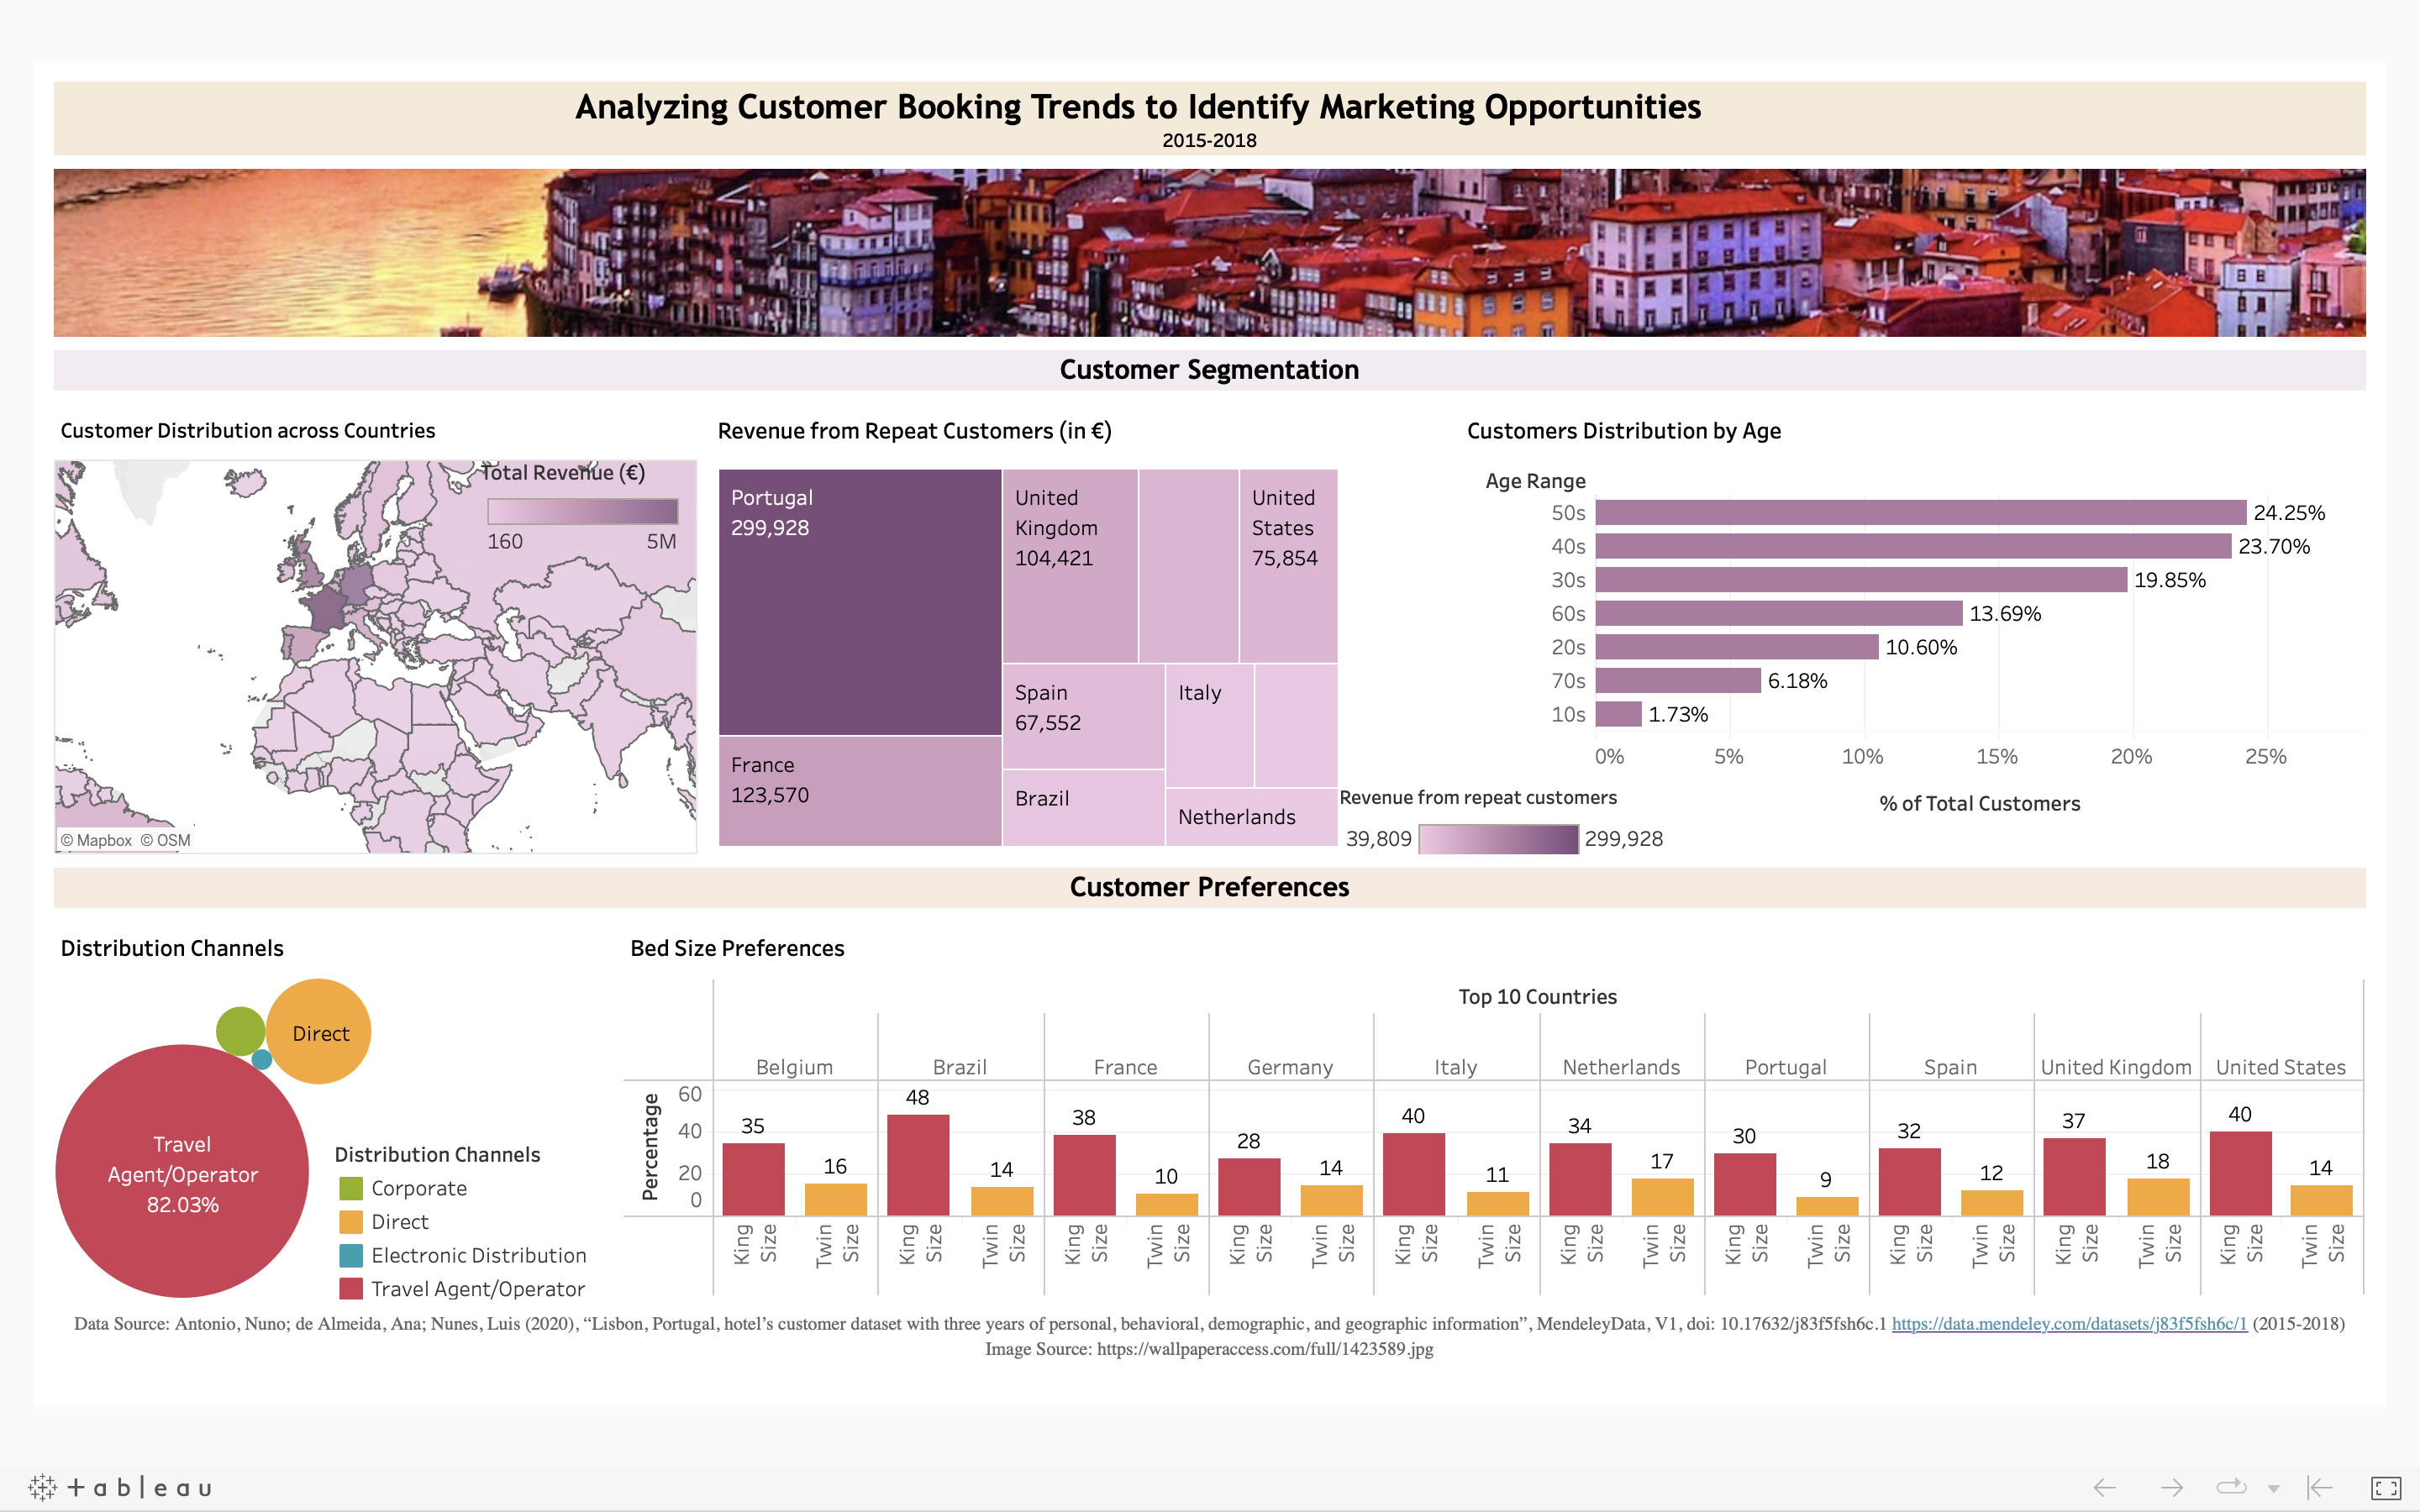

## Appendix 2 References

- Markdown for Jupyter Cheat Sheet https://notebook.community/tschinz/iPython_Workspace/00_Admin/CheatSheet/Markdown%20CheatSheet

- SQL STDEV Function<br> 
https://www.tutorialgateway.org/sql-stdev-function/

- A hotel's customers personal, behavioral, demographic, and geographic dataset from Lisbon, Portugal (2015–2018) Nuno Antonio, Ana de Almeida, and Luis Nunes for Data in Brief https://www.sciencedirect.com/science/article/pii/S2352340920314645?via%3Dihub


- Marketing Segementation<br> 
 https://www.pickfu.com/audiences#demographic-segmentation  